# Ray reflection

On this course so far, we have learned how to examine a range of surfaces (standard mathematical objects like planes spheres and cones; surface patches; 2D boxes; 3D parallelogram plane segments and triangular plane segments). We have also learned how to detect intersections between rays and these objects (and calculate normals at any intersection locations).

Now we will consider ray behaviour **after** intersecting an object. In this workbook we will review how to calculate the path of a ray which **reflects** off an object.


In [17]:
## Libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import Axes3D, proj3d
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

3D arrows will again prove useful:

In [18]:
class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        super().__init__((0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def do_3d_projection(self, renderer=None):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, self.axes.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))

        return np.min(zs)

## Background

In the lectures we saw that the path of a ray after intersecting an object could be determined by knowing the incident vector direction, ${\mathbf{\vec{u}}}$ and the normal vector to the surface at the point of intersection ${\mathbf{\vec{n}}}$. If these are known, the reflected ray would travel along the vector ${\mathbf{\vec{v}}}$, which can be calculated according to:

$$
{\mathbf{\vec{v}}}={\mathbf{\vec{u}}}-2\left({{\mathbf{\vec{u}}}\cdot{\mathbf{\vec{n}}}}\right)\frac{{\mathbf{\vec{n}}}}{|{\mathbf{\vec{n}}}|^2}
$$

We will use an example from the lectures to illustrate the behaviour we hope to see. Example 1 in the lectures does not have a specific origin for the ray, therefore we'll use Example 2, describing the reflection of a ray from a cone.


### Lecture Example 2
**A ray is defined by its vector equation as $\vec{r}=2\vec{i}-\vec{j}+3\vec{k}+t\left(\vec{i}+\vec{j}+\vec{k}\right)$. Determine the point where it first intersects the surface of the cone $x^2+y^2=z^2$ and hence obtain the equation of the reflected ray from this surface.**

Lets begin by visualising the cone and the ray, using code recycled from the curves and surfaces workbook:

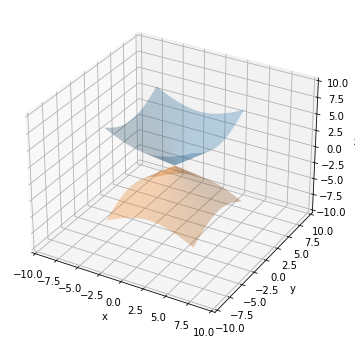

In [22]:
def g(x,y):
    return np.sqrt(x**2+y**2)

xlim = -10,10
ylim = -10,10
zlim = -10,10

xrange2 = np.linspace(-5, 5, 100)
yrange2 = np.linspace(-5, 5, 100)
X2, Y2 = np.meshgrid(xrange2, yrange2)
#remember because z^2=x^2+y^2, z=+/-sqrt(x^2+y^2)
Z2 = g(X2, Y2)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(12,6))
ax.set_xlim(*xlim)
ax.set_ylim(*ylim)
ax.set_zlim(*zlim)
ax.plot_surface(X2, Y2, Z2, alpha=0.3, label='positive cone')
ax.plot_surface(X2, Y2, -Z2, alpha=0.3, label='negative cone')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.show()

In [25]:
x, y, z  = sym.Symbol('x'), sym.Symbol('y'), sym.Symbol('z')  #parameters
cone = x**2+y**2-z**2

def grad(phi):
    gradphi = [sym.diff(phi,x), sym.diff(phi,y), sym.diff(phi,z)]
    return gradphi

print, grad(cone)


(<function print>, [2*x, 2*y, -2*z])

In [3]:
#define symbols and 3D parametric functions
r, theta  = sym.Symbol('r'), sym.Symbol('theta') #parameters
s  = [ r*sym.cos(theta), r*sym.sin(theta), r**2 ] #position r(t)
dsdr = [ sym.diff(s[0],r), sym.diff(s[1],r), sym.diff(s[2],r) ] #tangent, ds/dr
dsdtheta = [ sym.diff(s[0],theta), sym.diff(s[1],theta), sym.diff(s[2],theta) ] #tangent, ds/dtheta

v1 = sym.Matrix(dsdr)
v2 = sym.Matrix(dsdtheta)
cp = v1.cross(v2)

# tangent location in parameter space (degrees)
r1 = 1.0
theta1 = math.radians(200)

#turn rx and ry into functions to plot them
xf = lambdify([r,theta],s[0])
yf = lambdify([r,theta],s[1])
zf = lambdify([r,theta],s[2])

#set up parameter ranges
rvals = np.linspace(0,2, 21)  #range of parameter r
thetavals = np.linspace(0, 2*np.pi, 21) #range of parameter theta
myr, myt = np.meshgrid(rvals,thetavals) # make a grid of values

# calculate x,y,z arrays of positions based on r and theta
xvals, yvals, zvals = xf(myr,myt), yf(myr,myt), zf(myr,myt)

#point on surface
xp = float(s[0].subs({r:r1, theta:theta1}))
yp = float(s[1].subs({r:r1, theta:theta1}))
zp = float(s[2].subs({r:r1, theta:theta1}))
p = [xp,yp,zp]

# unit normal to surface
nx = float(cp[0].subs({r: r1, theta: theta1}))
ny = float(cp[1].subs({r: r1, theta: theta1}))
nz = float(cp[2].subs({r: r1, theta: theta1}))
n = [nx,ny,nz]
n = n/np.linalg.norm(n)

#tangent plane
d = -np.sum(n * p)
tpeqn = "tangent plane eqn: {:.2f}x+{:.2f}y+{:.2f}z={:.3f}".format(n[0],n[1],n[2],d)

xlim = -4,4
ylim = -4,4
zlim = -2,6
xx, yy = np.meshgrid(np.arange(*xlim), np.arange(*ylim))
zz = -(n[0] * xx + n[1] * yy + d) / n[2]
#zz[zz>6] = np.nan
#zz[zz<-2] = np.nan

# plot
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(12,6))
ax.set_zlim(*zlim)
surf = ax.plot_wireframe(xvals, yvals, zvals, rstride=2, cstride=2, label='parabolic bowl')
ax.scatter(xp, yp, zp, color='r', s=50, label='location')
arrow_prop_dict = dict(mutation_scale=20, arrowstyle='-|>', color='k', shrinkA=0, shrinkB=0, linewidth=1)
b = Arrow3D([xp, xp-n[0]], [yp, yp-n[1]], [zp, zp-n[2]], **arrow_prop_dict)
ax.add_artist(b)
ax.plot_surface(xx, yy, zz, alpha=0.3, label='tangent plane')
ax.title.set_text(tpeqn)
#ax.legend()
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.show()

First we have defined two unknown parameters, $u$ and $v$. These parameters determine every position on the plane, and are constrained to be between zero and one. By telling Python that these symbols are positive, we are effectively constraining Python to only find positive values of $u$ and $v$ when it searches for solutions to the simultaneous equations we will set up later. Now we can construct our parallelogram from the four coordinates given in the question:

In [4]:
A = sym.Matrix([[0, 0, 0]])
B = sym.Matrix([[3, 4, -2]])
C = sym.Matrix([[2, 3, 1]])
D = sym.Matrix([[-1, -1, 3]])

To construct a parallelogram equation, we need to identify two parallel sides: the paralellogram plane equation requires **two non-parallel edges**. There are several ways to do this:

Lets check what all the vectors linking A with the other points look like (remembering that two of these will be edge vectors, with the other vector bisecting the plane):

In [5]:
print("A-B:", A-B)
print("A-C:", A-C)
print("A-D:", A-D)

A-B: Matrix([[-3, -4, 2]])
A-C: Matrix([[-2, -3, -1]])
A-D: Matrix([[1, 1, -3]])


Let's also print the other vectors we could use: 

In [6]:
print("B-C:", B-C)
print("B-D:", B-D)
print("C-D:", C-D)

B-C: Matrix([[1, 1, -3]])
B-D: Matrix([[4, 5, -5]])
C-D: Matrix([[3, 4, -2]])


Just by subtracting the points, we can see that AD = BC: this means these vectors are parallel. Using the same method we can see that CD is parallel to AB (the sign change between AB and CD arises from where we have started and ended the vector, and doesn't affect whether they are parallel).

If we want to create our parallelogram using point A as our initial reference point, our findings mean that the two edges we need are AB and AD - these are non-parallel edges, but have a twin parallel edge somewhere else. The vectors which pass through the plane are *not* parallel with any other vector (they are unique).

Lets double check that the vectors AB and AD are not parallel:

In [7]:
print("AB x AD:",A-B.cross(A-D))

AB x AD: Matrix([[10, -7, 1]])


The fact that the cross product is non-zero is enough evidence that these vectors are not parallel. (To illustrate what happens when we take the cross product of two parallel vectors, lets use ones we identified earlier, AD and BC:

In [8]:
print("AD x BC:",(A-D).cross(B-C))

AD x BC: Matrix([[0, 0, 0]])


The cross product of AD with BC is zero: they are parallel vectors.

We can therefore use our non-parallel vectors (neither of which bisects the parallelogram) to construct the equation of a parallelogram plane segment. In the lectures this looked like:

$$
\vec{r}=\vec{p}+u\vec{a}+v\vec{b},~~~0\le u,v\le 1.
$$

In [9]:
rp = A + u * (B-A) + v * (D-A)
print(rp)

Matrix([[3*u - v, 4*u - v, -2*u + 3*v]])


This expression matches the solution we determined in class. Can we see what this looks like?

In [10]:
print((A.tolist()[0])[0])

0


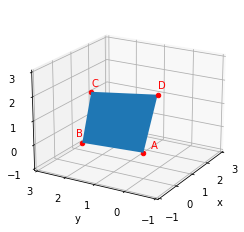

In [11]:
Aa = np.array(A.tolist()[0],dtype='float64')
Ba = np.array(B.tolist()[0],dtype='float64')
Ca = np.array(C.tolist()[0],dtype='float64')
Da = np.array(D.tolist()[0],dtype='float64')
verts = [list(zip([Aa[0],Ba[0],Ca[0],Da[0]],[Aa[1],Ba[1],Ca[1],Da[1]],[Aa[2],Ba[2],Ca[2],Da[2]]))]
ax = plt.figure().add_subplot(projection='3d')
ax.view_init(elev=20, azim=210, roll=0)
ax.axes.set_xlim3d(left=-1, right=3) 
ax.axes.set_ylim3d(bottom=-1, top=3) 
ax.axes.set_zlim3d(bottom=-1, top=3)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.add_collection3d(Poly3DCollection(verts))
ax.scatter(Aa[0],Aa[1],Aa[2], c='r', marker='o', s=20)
ax.text(Aa[0], Aa[1]-0.25, Aa[2]+0.25, "A", c='r') 
ax.scatter(Ba[0],Ba[1],Ba[2], c='r', marker='o', s=20)
ax.text(Ba[0], Ba[1]+0.25, Ba[2]+0.25, "B", c='r')
ax.scatter(Ca[0],Ca[1],Ca[2], c='r', marker='o', s=20)
ax.text(Ca[0], Ca[1], Ca[2]+0.25, "C", c='r') 
ax.scatter(Da[0],Da[1],Da[2], c='r', marker='o', s=20)
ax.text(Da[0], Da[1], Da[2]+0.25, "D", c='r')
plt.show()

This allows us to visualise the parallelogram (blue) and its component vertices (red).

### Example 2: Ray and parallelogram intersection?
**Determine whether the ray from $(5,2,1)$ to**


1.   **$(0,-3,4)$**
2.   **$(-2,2,1)$**

**intersects the plane segment in Example 1.**


---

We can hopefully reuse the structures we already created, and simply create two rays using the technique we already encountered:


In [12]:
t = sym.Symbol('t', positive=True)
r_o = sym.Matrix([[5, 2, -1]])
r1_e = sym.Matrix([[0, -3, 4]])
r2_e = sym.Matrix([[-2, 2, 1]])
r1 = r_o + t * (r1_e-r_o)
r2 = r_o + t * (r2_e-r_o)

For part 1, we need to solve the system of equations created by equating the ray and plane. Python can't solve equations like "ray = plane", unless we arrange the equations to read "ray - plane = 0". We then insert the LHS into the solver:

In [13]:
sols1 = sym.solve(r1-rp,(u,v,t))
print(sols1)

[]


This very quickly establishes that, due to the constraints we placed on $u,v,t$ (namely that they be real and positive), the solver returns no solutions.

For the ray in Part 2, we can repeat this process:

In [14]:
sols2 = sym.solve(r2-rp,(u,v,t))
print(sols2)

{u: 41/68, v: 7/17, t: 35/68}


These values exactly match those we calculated in class, and lie within the appropriate ranges to make this a true intersection point.

In [15]:
r2t = list(sols2.values())[2].evalf()
rpi = r2.subs(t,r2t)
lv=[95./68., 2., 1./34.]
print("intersection in lectures found at ({:0.5f}, {:0.5f}, {:0.5f})".format(lv[0],lv[1],lv[2]))
print("Python finds:",rpi)

intersection in lectures found at (1.39706, 2.00000, 0.02941)
Python finds: Matrix([[1.39705882352941, 2, 0.0294117647058822]])


So we find that (when we evaluate the fractions given in lectures!) that the answer given by Python is correct.

A final sanity check is to visually show the two rays and intersection location overlaid with the parallelogram plane segment:

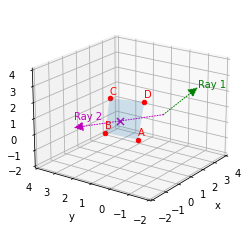

In [16]:
rpia = np.array(rpi.tolist()[0],dtype='float64')
ax = plt.figure().add_subplot(projection='3d')
ax.view_init(elev=20, azim=215, roll=0)
ax.axes.set_xlim3d(left=-2, right=4) 
ax.axes.set_ylim3d(bottom=-2, top=4) 
ax.axes.set_zlim3d(bottom=-2, top=4)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.add_collection3d(Poly3DCollection(verts, alpha=0.2))
ax.scatter(Aa[0],Aa[1],Aa[2], c='r', marker='o', s=20)
ax.text(Aa[0], Aa[1], Aa[2]+0.25, "A", c='r') 
ax.scatter(Ba[0],Ba[1],Ba[2], c='r', marker='o', s=20)
ax.text(Ba[0], Ba[1], Ba[2]+0.25, "B", c='r')
ax.scatter(Ca[0],Ca[1],Ca[2], c='r', marker='o', s=20)
ax.text(Ca[0], Ca[1], Ca[2]+0.25, "C", c='r') 
ax.scatter(Da[0],Da[1],Da[2], c='r', marker='o', s=20)
ax.text(Da[0], Da[1], Da[2]+0.25, "D", c='r')
ax.scatter(rpia[0],rpia[1],rpia[2], c='m', marker='x', s=50)
ro  = np.array(r_o.tolist()[0],dtype='float64')
r1e  = np.array(r1_e.tolist()[0],dtype='float64')
r2e  = np.array(r2_e.tolist()[0],dtype='float64') 
arrow_prop_dict = dict(mutation_scale=20, arrowstyle='-|>', color='g', shrinkA=0, shrinkB=0, linewidth=1, linestyle=":")
a = Arrow3D([ro[0], r1e[0]], [ro[1], r1e[1]], [ro[2], r1e[2]], **arrow_prop_dict)
ax.add_artist(a)
ax.text(r1e[0], r1e[1], r1e[2], "Ray 1", c='g')
arrow_prop_dict = dict(mutation_scale=20, arrowstyle='-|>', color='m', shrinkA=0, shrinkB=0, linewidth=1, linestyle=':')
b = Arrow3D([ro[0], r2e[0]], [ro[1], r2e[1]], [ro[2], r2e[2]], **arrow_prop_dict)
ax.add_artist(b)
ax.text(r2e[0], r2e[1], r2e[2]+0.5, "Ray 2", c='m')
plt.show()

(noting that in this case the axis are no longer presented in Cartesian coordinates).

## Triangular Plane Segments
Finally, we will explore how this process changes if we need to work with triangular plane segments. Triangular plane segments are more commonly used in graphics applications (with only three points in space required to map out a 3D surface, many triangular plane segments are often combined to create large, complex 3D objects). Let's again see how Python handles these types of structures:

### Lecture Example:
**Determine if the ray from $(2,1,2)$ to $(-1,-1,0)$ cuts the triangular plane segment vertices at $A(5,0,0)$, $B(0,3,0)$, and $C(0,0,4)$.**


---

In order to construct a parametric equation describing every point on the surface, we need to pick two sides of the triangle to act as vectors. However, unlike the parallelogram plane, we have to pick the second vector which begins when the first vector begins.


In [17]:
A3 = sym.Matrix([[5, 0, 0]])
B3 = sym.Matrix([[0, 3, 0]])
C3 = sym.Matrix([[0, 0, 4]])
rpt = A3 + u * (B3-A3) + v * (C3-B3)
print(rpt)

Matrix([[5 - 5*u, 3*u - 3*v, 4*v]])


In [20]:
r3_o = sym.Matrix([[2, 1, 2]])
r3_e = sym.Matrix([[-1, -1, 0]])
r3 = r3_o + t * (r3_e-r3_o)
sols3 = sym.solve(r3-rpt,(u,v,t))
print(sols3)
r3uvt = list(sols3.values())
if r3uvt[0] > r3uvt[1] :
  print("u>v, hence valid intersection at:")
  rpi3 = r3.subs(t,r3uvt[2])
  print(rpi3)
  rpia3 = np.array(rpi3.tolist()[0],dtype='float64')

{u: 36/53, v: 23/53, t: 7/53}
u>v, hence valid intersection at:
Matrix([[85/53, 39/53, 92/53]])


Let's check what this physically looks like:

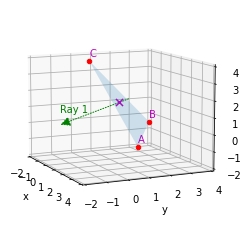

In [19]:
Aa3 = np.array(A3.tolist()[0],dtype='float64')
Ba3 = np.array(B3.tolist()[0],dtype='float64')
Ca3 = np.array(C3.tolist()[0],dtype='float64')
verts3 = [list(zip([Aa3[0],Ba3[0],Ca3[0]],[Aa3[1],Ba3[1],Ca3[1]],[Aa3[2],Ba3[2],Ca3[2]]))]
ax3 = plt.figure().add_subplot(projection='3d')
ax3.view_init(elev=10, azim=-25, roll=0)
ax3.axes.set_xlim3d(left=-2, right=4) 
ax3.axes.set_ylim3d(bottom=-2, top=4) 
ax3.axes.set_zlim3d(bottom=-2, top=4)
ax3.set_xlabel('x')
ax3.set_ylabel('y')
ax3.set_zlabel('z')
ax3.add_collection3d(Poly3DCollection(verts3, alpha=0.2))
ax3.scatter(Aa3[0],Aa3[1],Aa3[2], c='r', marker='o', s=20)
ax3.text(Aa3[0], Aa3[1], Aa3[2]+0.25, "A", c='m') 
ax3.scatter(Ba3[0],Ba3[1],Ba3[2], c='r', marker='o', s=20)
ax3.text(Ba3[0], Ba3[1], Ba3[2]+0.25, "B", c='m')
ax3.scatter(Ca3[0],Ca3[1],Ca3[2], c='r', marker='o', s=20) 
ax3.text(Ca3[0], Ca3[1], Ca3[2]+0.25, "C", c='m')
ax3.scatter(rpia3[0],rpia3[1],rpia3[2], c='m', marker='x', s=50)
ro3  = np.array(r3_o.tolist()[0],dtype='float64')
re3  = np.array(r3_e.tolist()[0],dtype='float64')
arrow_prop_dict = dict(mutation_scale=20, arrowstyle='-|>', color='g', shrinkA=0, shrinkB=0, linewidth=1, linestyle=":")
a = Arrow3D([ro3[0], re3[0]], [ro3[1], re3[1]], [ro3[2], re3[2]], **arrow_prop_dict)
ax3.add_artist(a)
ax3.text(re3[0], re3[1], re3[2]+0.75, "Ray 1", c='g')
plt.show()

As we can see from the image, we successfully formed a triangular plane segment between the three vertices, and indeed (as seen in the lectures) the chosen ray intersects the triangular plane segment at the location we have found.

## Over to you
The aim of this course is to familiarise and become an expert in the mathematics underpinning several common standard games tools and techniques. You should carry out the questions in the tutorial booklet **by hand** to practice this mathematics and prepare for the exam. However, particularly in this topic, the mathematics is not easily visualised; having completed the maths exercises, try and visualise some of the solutions you have created to verify the ray behaviour. 